In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import sklearn as sk
from sklearn import neighbors
import preprocessing as pp
import utilities as u
import MAPInference as mapi
from matplotlib import pyplot as plt
import pickle
import os
from glob import glob
from sklearn.decomposition import PCA as pca
from scipy.optimize import minimize
import imageio
from PIL import Image
from sklearn import kernel_ridge, neighbors

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
picpath = os.path.join("D:\\","FrameGrabber")

pics = glob(os.path.join(picpath,"*.png"))

In [3]:
stimDict = {}
for pic in pics:
    # get stimulus values from string
    _,stimstr = os.path.split(pic)
    stimstr,_ = os.path.splitext(stimstr)
    stimparts = stimstr.split("_")
    morph = np.float(stimparts[0].split("morph")[1])
    walljit = np.float(stimparts[1].split("wallJit")[1])
    bckgndjit = np.float(stimparts[2].split("bckgndJit")[1])
    towerjit = np.float(stimparts[3].split("towerJit")[1])
    pos = np.float(stimparts[4].split("pos")[1])
    
    stimkey = (morph,walljit,bckgndjit,towerjit)
   
    # if stimulus not yet encountered
    #    make new dictionary key with empty list
    if stimkey not in stimDict.keys():
        stimDict[stimkey]={}
    
    # append file name to dictionary key
    stimDict[stimkey][pos]=pic
    
    
    
    

In [4]:
# check that each list is the same length
positions,keys = [],[]
for i, (k,v) in enumerate(stimDict.items()):
    keys.append(k)
    positions.append(np.sort(np.array([pos for pos in v.keys()])))

old_row = positions[0]
keystokill =[]
for i, new_row in enumerate(positions):
    if old_row.all() != new_row.all():
        print("row %i is fucked" % i)
        print("key",keys[i])
        keystokill.append(keys[i])
        


row 304 is fucked
key (1.0, 0.06922948, -0.01515506, -0.09076788)


In [5]:
# delete fucked up entries
for k in keystokill:
    try:  
        stimDict.pop(k)
        keys.remove(k)
    except KeyError:
        print("key not found",k)

In [6]:
# init memory mapped file

# load first file, downsample by 4
pic = Image.open(pics[10])
pic = np.array(pic.resize((int(pic.size[0]/4),int(pic.size[1]/4))))
pic_fft = np.fft.rfftn(pic,axes=[0,1])
pic_as = np.abs(pic_fft[:int((pic.shape[0]-1)/2)+1,:])

# get size of fft

# n frames per trial
pos_keys = [pos for pos in positions[0] if pos >0]
pos_keys = pos_keys[::5]
nframes = len(pos_keys)


# n rows is (size of flattened fft of 1 frame) * (number of frames per trial) x (number of stimulus conditions)
# with open(os.path.join("D:\\FrameGrabber","DATA.dat"),"wb") as f:
# data = np.memmap(os.path.join("D:\\FrameGrabber","DATA.dat"),mode="w+",shape = (int(nframes*pic_as.size*3),len(keys)))

In [7]:
# for each dictionary entry
for i,key in enumerate(keys):
    # save wall morph, tower morph, background morph
    print(key)
    # for each picture
    for j, pos in enumerate(pos_keys):
    
        #   load file
        f = stimDict[key][pos]
        pic = Image.open(f)
        pic = np.array(pic.resize((int(pic.size[0]/4),int(pic.size[1]/4))))
        pic_fft = np.fft.rfftn(pic,axes=[0,1])
        pic_as = np.real(pic_fft[:int((pic.shape[0]-1)/2)+1,:]**2)
#         print(i,j)
        data[j*pic_as.size:(j+1)*pic_as.size,i]=pic_as.ravel()
        
        
    
    #   do real fftn,
    
    #   take magnitude of positive frequencies
    
    #   insert into memory mapped array

(0.25, -0.05, -0.05, -0.05)
(0.25, -0.05, -0.05, -0.1)
(0.25, -0.05, -0.05, 0.05)
(0.25, -0.05, -0.05, 0.0)
(0.25, -0.05, -0.1, -0.05)
(0.25, -0.05, -0.1, -0.1)
(0.25, -0.05, -0.1, 0.05)
(0.25, -0.05, -0.1, 0.0)
(0.25, -0.05, 0.05, -0.05)
(0.25, -0.05, 0.05, -0.1)
(0.25, -0.05, 0.05, 0.05)
(0.25, -0.05, 0.05, 0.0)
(0.25, -0.05, 0.0, -0.05)
(0.25, -0.05, 0.0, -0.1)
(0.25, -0.05, 0.0, 0.05)
(0.25, -0.05, 0.0, 0.0)
(0.25, -0.1, -0.05, -0.05)
(0.25, -0.1, -0.05, -0.1)
(0.25, -0.1, -0.05, 0.05)
(0.25, -0.1, -0.05, 0.0)
(0.25, -0.1, -0.1, -0.05)
(0.25, -0.1, -0.1, -0.1)
(0.25, -0.1, -0.1, 0.05)
(0.25, -0.1, -0.1, 0.0)
(0.25, -0.1, 0.05, -0.05)
(0.25, -0.1, 0.05, -0.1)
(0.25, -0.1, 0.05, 0.05)
(0.25, -0.1, 0.05, 0.0)
(0.25, -0.1, 0.0, -0.05)
(0.25, -0.1, 0.0, -0.1)
(0.25, -0.1, 0.0, 0.05)
(0.25, -0.1, 0.0, 0.0)
(0.25, 0.05, -0.05, -0.05)
(0.25, 0.05, -0.05, -0.1)
(0.25, 0.05, -0.05, 0.05)
(0.25, 0.05, -0.05, 0.0)
(0.25, 0.05, -0.1, -0.05)
(0.25, 0.05, -0.1, -0.1)
(0.25, 0.05, -0.1, 0.05)
(0.2

In [9]:
# run svd on memory mapped array 
s = np.linalg.svd(data[:,:],compute_uv=False)

NameError: name 's' is not defined

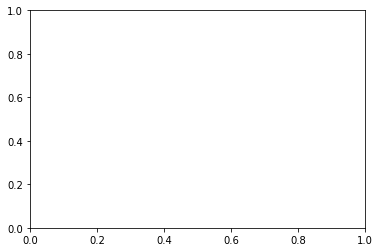

In [96]:
f,ax = plt.subplots()
ax.plot(s[:10])
# f.savefig("D:\\Morph_Results\\stim_fft_dim.png",format="png")

In [7]:
# trialcov = np.dot(data.T,data)
# G:\My Drive\VR_SreenCapture_TwoTower
trialcov = np.load("G:\\My Drive\\VR_SreenCapture_TwoTower\\trialcov.npy")

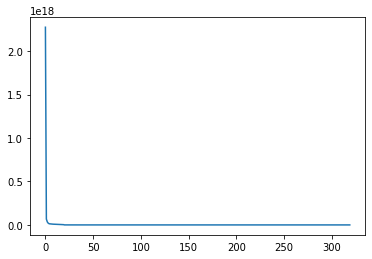

In [8]:
w,v = np.linalg.eig(trialcov)
f,ax = plt.subplots()
ax.plot(np.abs(w))
princip = np.real(100*v[:,0])
princip_norm = (princip-np.amin(princip))/(np.amax(princip)-np.amin(princip))
# print(princip)

In [9]:
keys = np.array(keys)


In [10]:
mask = keys[:,1]!=-.1
keys=keys[mask]
princip_norm = princip_norm[mask]

In [11]:
getf = lambda s : s*2.5 + (1-s)*3.5
gettheta = lambda s: (s*60. + (1-s)*10.)*np.pi/180
xfreq = lambda s: np.abs(getf(s)*1500/120*(np.cos(gettheta(s) + np.pi/4.)-np.sin(gettheta(s)+np.pi/4.))) 
yfreq = lambda s: np.abs(getf(s)*1500/120*(np.cos(gettheta(s) + np.pi/4.)+np.sin(gettheta(s)+np.pi/4.))) 
ang = lambda x,y: np.arctan(x/y)*180/np.pi
angmorph = lambda s: (ang(xfreq(s),yfreq(s))-ang(xfreq(-.1),yfreq(-.1)))/(ang(xfreq(1.1),yfreq(1.1))-ang(xfreq(-.1),yfreq(-.1)))
wallmorphx = lambda s: (xfreq(s)-xfreq(-.1))/(xfreq(1.1)-xfreq(-.1))
wallmorphy = lambda s: (yfreq(s)-yfreq(-.1))/(yfreq(1.1)-yfreq(-.1))

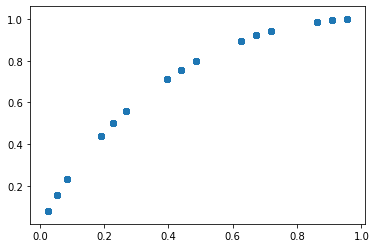

In [12]:
f,ax = plt.subplots()
ax.scatter(wallmorphy(keys[:,0]+keys[:,1]),wallmorphx(keys[:,0]+keys[:,1]))

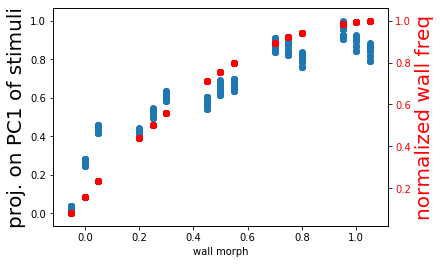

In [34]:
f,ax = plt.subplots()

ax.scatter(keys[:,0]+keys[:,1],princip_norm)
ax.set_ylabel("proj. on PC1 of stimuli",fontsize=20)
ax.set_xlabel("wall morph")
ax2 = ax.twinx()
# ax2.scatter(keys[mask,0]+keys[mask,1],2*wallmorphx(keys[mask,0]+keys[mask,1])-1.*wallmorphy(keys[mask,0]+keys[mask,1]),color='red')
wmx = wallmorphx(keys[:,0]+keys[:,1])
wmy =  wallmorphy(keys[:,0]+keys[:,1])
ax2.scatter(keys[:,0]+keys[:,1],wmx ,color='red')
ax2.set_ylabel('normalized wall freq',color='red',fontsize=20)
ax2.tick_params(axis='y',labelcolor='red')
# f.savefig("D:\\Morph_Results\\figures\\stim_fft_v_wallFreq.png",format="png")

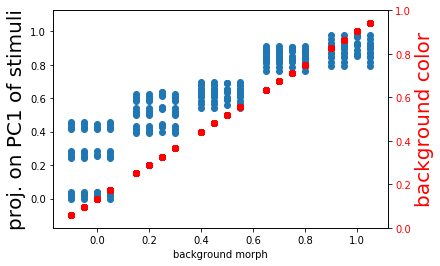

In [14]:
f,ax = plt.subplots()
ax.scatter(keys[:,0]+keys[:,2],princip_norm)
ax.set_ylabel("proj. on PC1 of stimuli",fontsize=20)
ax.set_xlabel("background morph")
ax2 = ax.twinx()
ax.scatter(keys[:,0]+keys[:,2],keys[:,0]+keys[:,2],color='red')
ax2.set_ylabel('background color',color='red',fontsize=20)
ax2.tick_params(axis='y',labelcolor='red')
f.savefig("D:\\Morph_Results\\figures\\stim_fft_v_bckgnd.png",format="png")

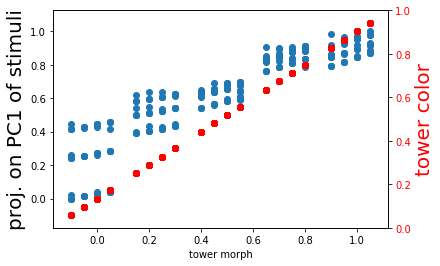

In [15]:
f,ax = plt.subplots()
ax.scatter(keys[:,0]+keys[:,3],princip_norm)
ax.set_ylabel("proj. on PC1 of stimuli",fontsize=20)
ax.set_xlabel("tower morph")
ax2 = ax.twinx()
ax.scatter(keys[:,0]+keys[:,3],keys[:,0]+keys[:,3],color='red')
ax2.set_ylabel('tower color',color='red',fontsize=20)
ax2.tick_params(axis='y',labelcolor='red')
f.savefig("D:\\Morph_Results\\figures\\stim_fft_v_tower.png",format="png")

In [18]:

morphs = np.zeros(keys.shape)
morphs[:,0]=wallmorphx(keys[:,0]+keys[:,1])
# morphs[:,1]=ang(xfreq(keys[:,0]+keys[:,1]),yfreq(keys[:,0]+keys[:,1]))
morphs[:,1]=wallmorphy(keys[:,0]+keys[:,1])
morphs[:,2:]=keys[:,3:]+keys[:,:1]
# morphs = keys[:,1:]+keys[:,:1]
# lin_model = sk.linear_model.LinearRegression().fit(morphs,princip)
# lin_model = kernel_ridge.KernelRidge().fit(morphs,princip)
yhat = np.zeros([morphs.shape[0],])
for t in range(morphs.shape[0]):
    mask = np.ones([morphs.shape[0],])>0
    mask[t]=False
    train_x,train_y = morphs[mask,:],princip_norm[mask]
    lin_model = neighbors.KNeighborsRegressor(n_neighbors=5,weights='distance').fit(train_x,train_y)
    yhat[t]=lin_model.predict(morphs[t:t+1,:])

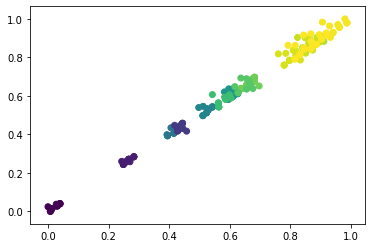

In [36]:
f,ax = plt.subplots()
ax.scatter(yhat,princip_norm,c= morphs[:,0].ravel())

lin_model = neighbors.KNeighborsRegressor(n_neighbors=10,weights='distance').fit(morphs,princip_norm)